<a href="https://colab.research.google.com/github/georgeY123-AI/Dual-Object-Detection-YOLOv8/blob/main/TOOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Thu Aug  1 20:14:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [5]:
# from ultralytics import YOLO

# from IPython.display import display, Image

/content


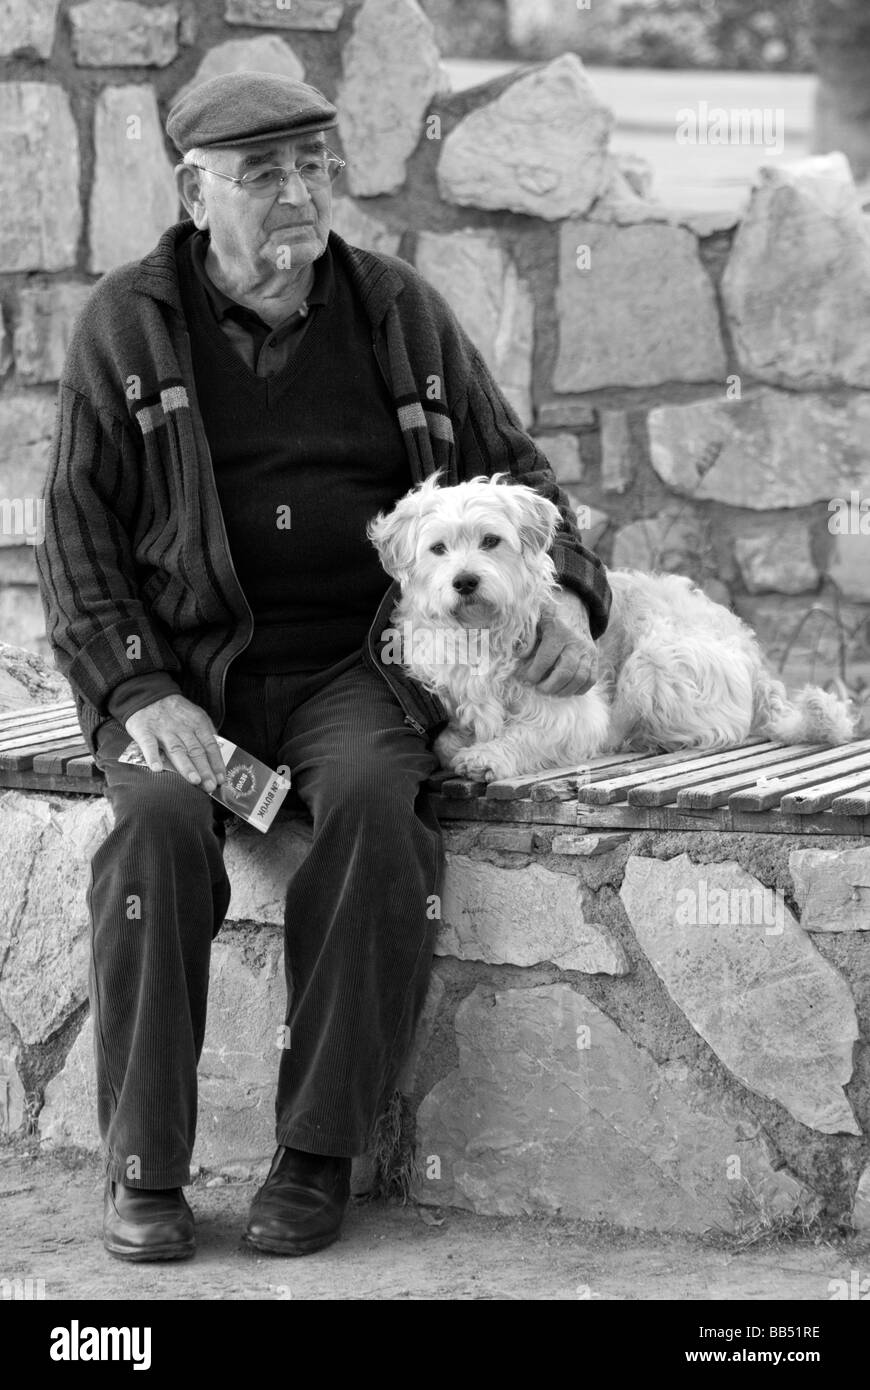

In [26]:
# %cd {HOME}
# Image(filename='/content/tee.jpg', height=600)

In [27]:
# %cd {HOME}
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/tee.jpg' save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/tee.jpg: 640x416 1 person, 2 dogs, 108.3ms
Speed: 5.6ms preprocess, 108.3ms inference, 571.0ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


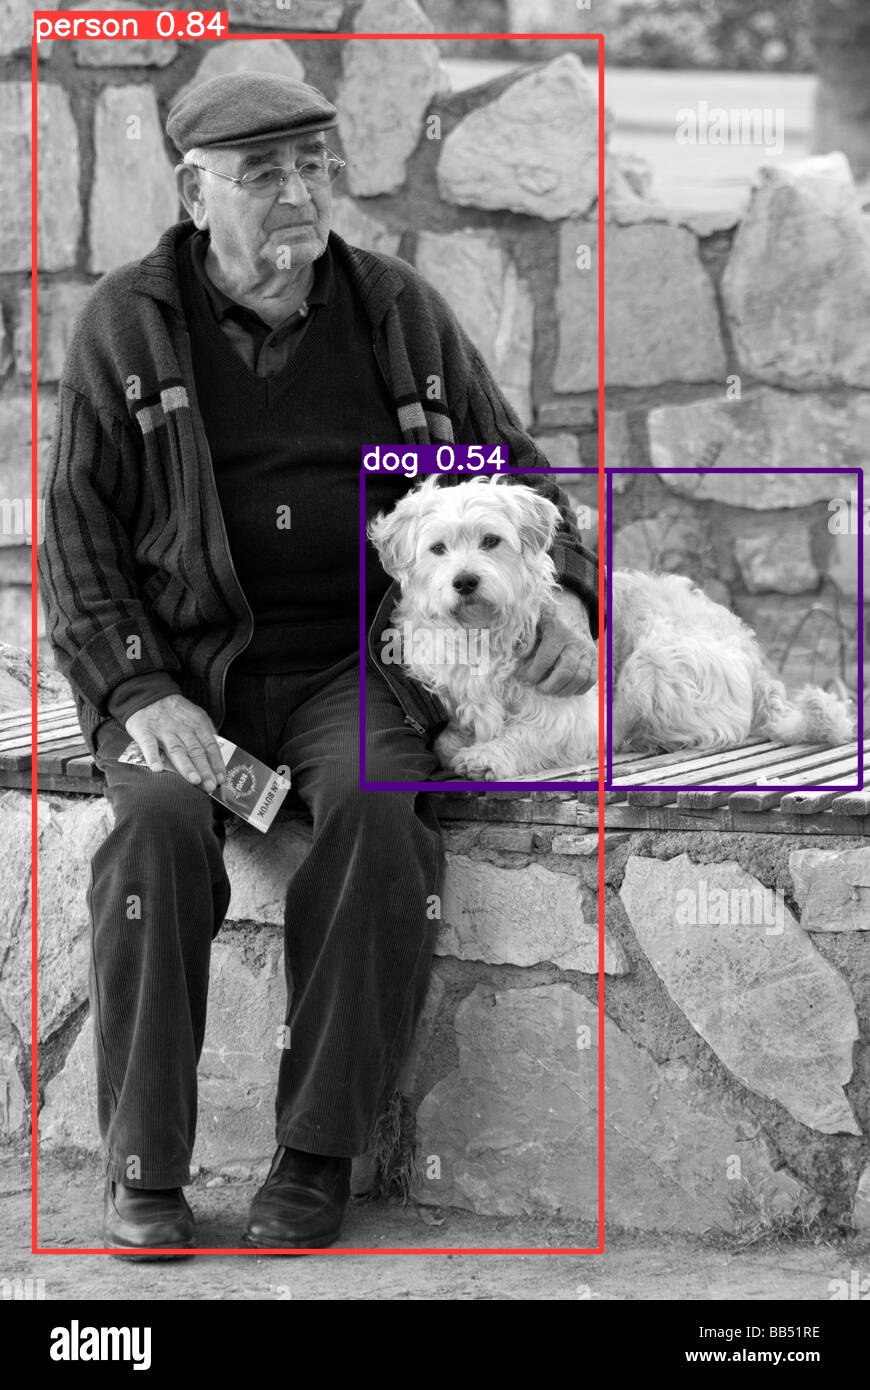

In [28]:
# %cd {HOME}
# Image(filename='/content/runs/detect/predict/tee.jpg', height=600)

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yUzL0Xpqnq0hK6Vuqv1f")
project = rf.workspace("mgaikwad").project("cartoon-qy3ja")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cartoon-1 in yolov8:: 100%|██████████| 1685/1685 [00:00<00:00, 8183.38it/s]


In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 454MB/s]
New https://pypi.org/project/ultralytics/8.2.71 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/cartoon-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [29]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1722543423.886af007c4b1.1750.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch630.jpg	weights
P_curve.png					    train_batch631.jpg
PR_curve.png					    train_batch632.jpg


/content


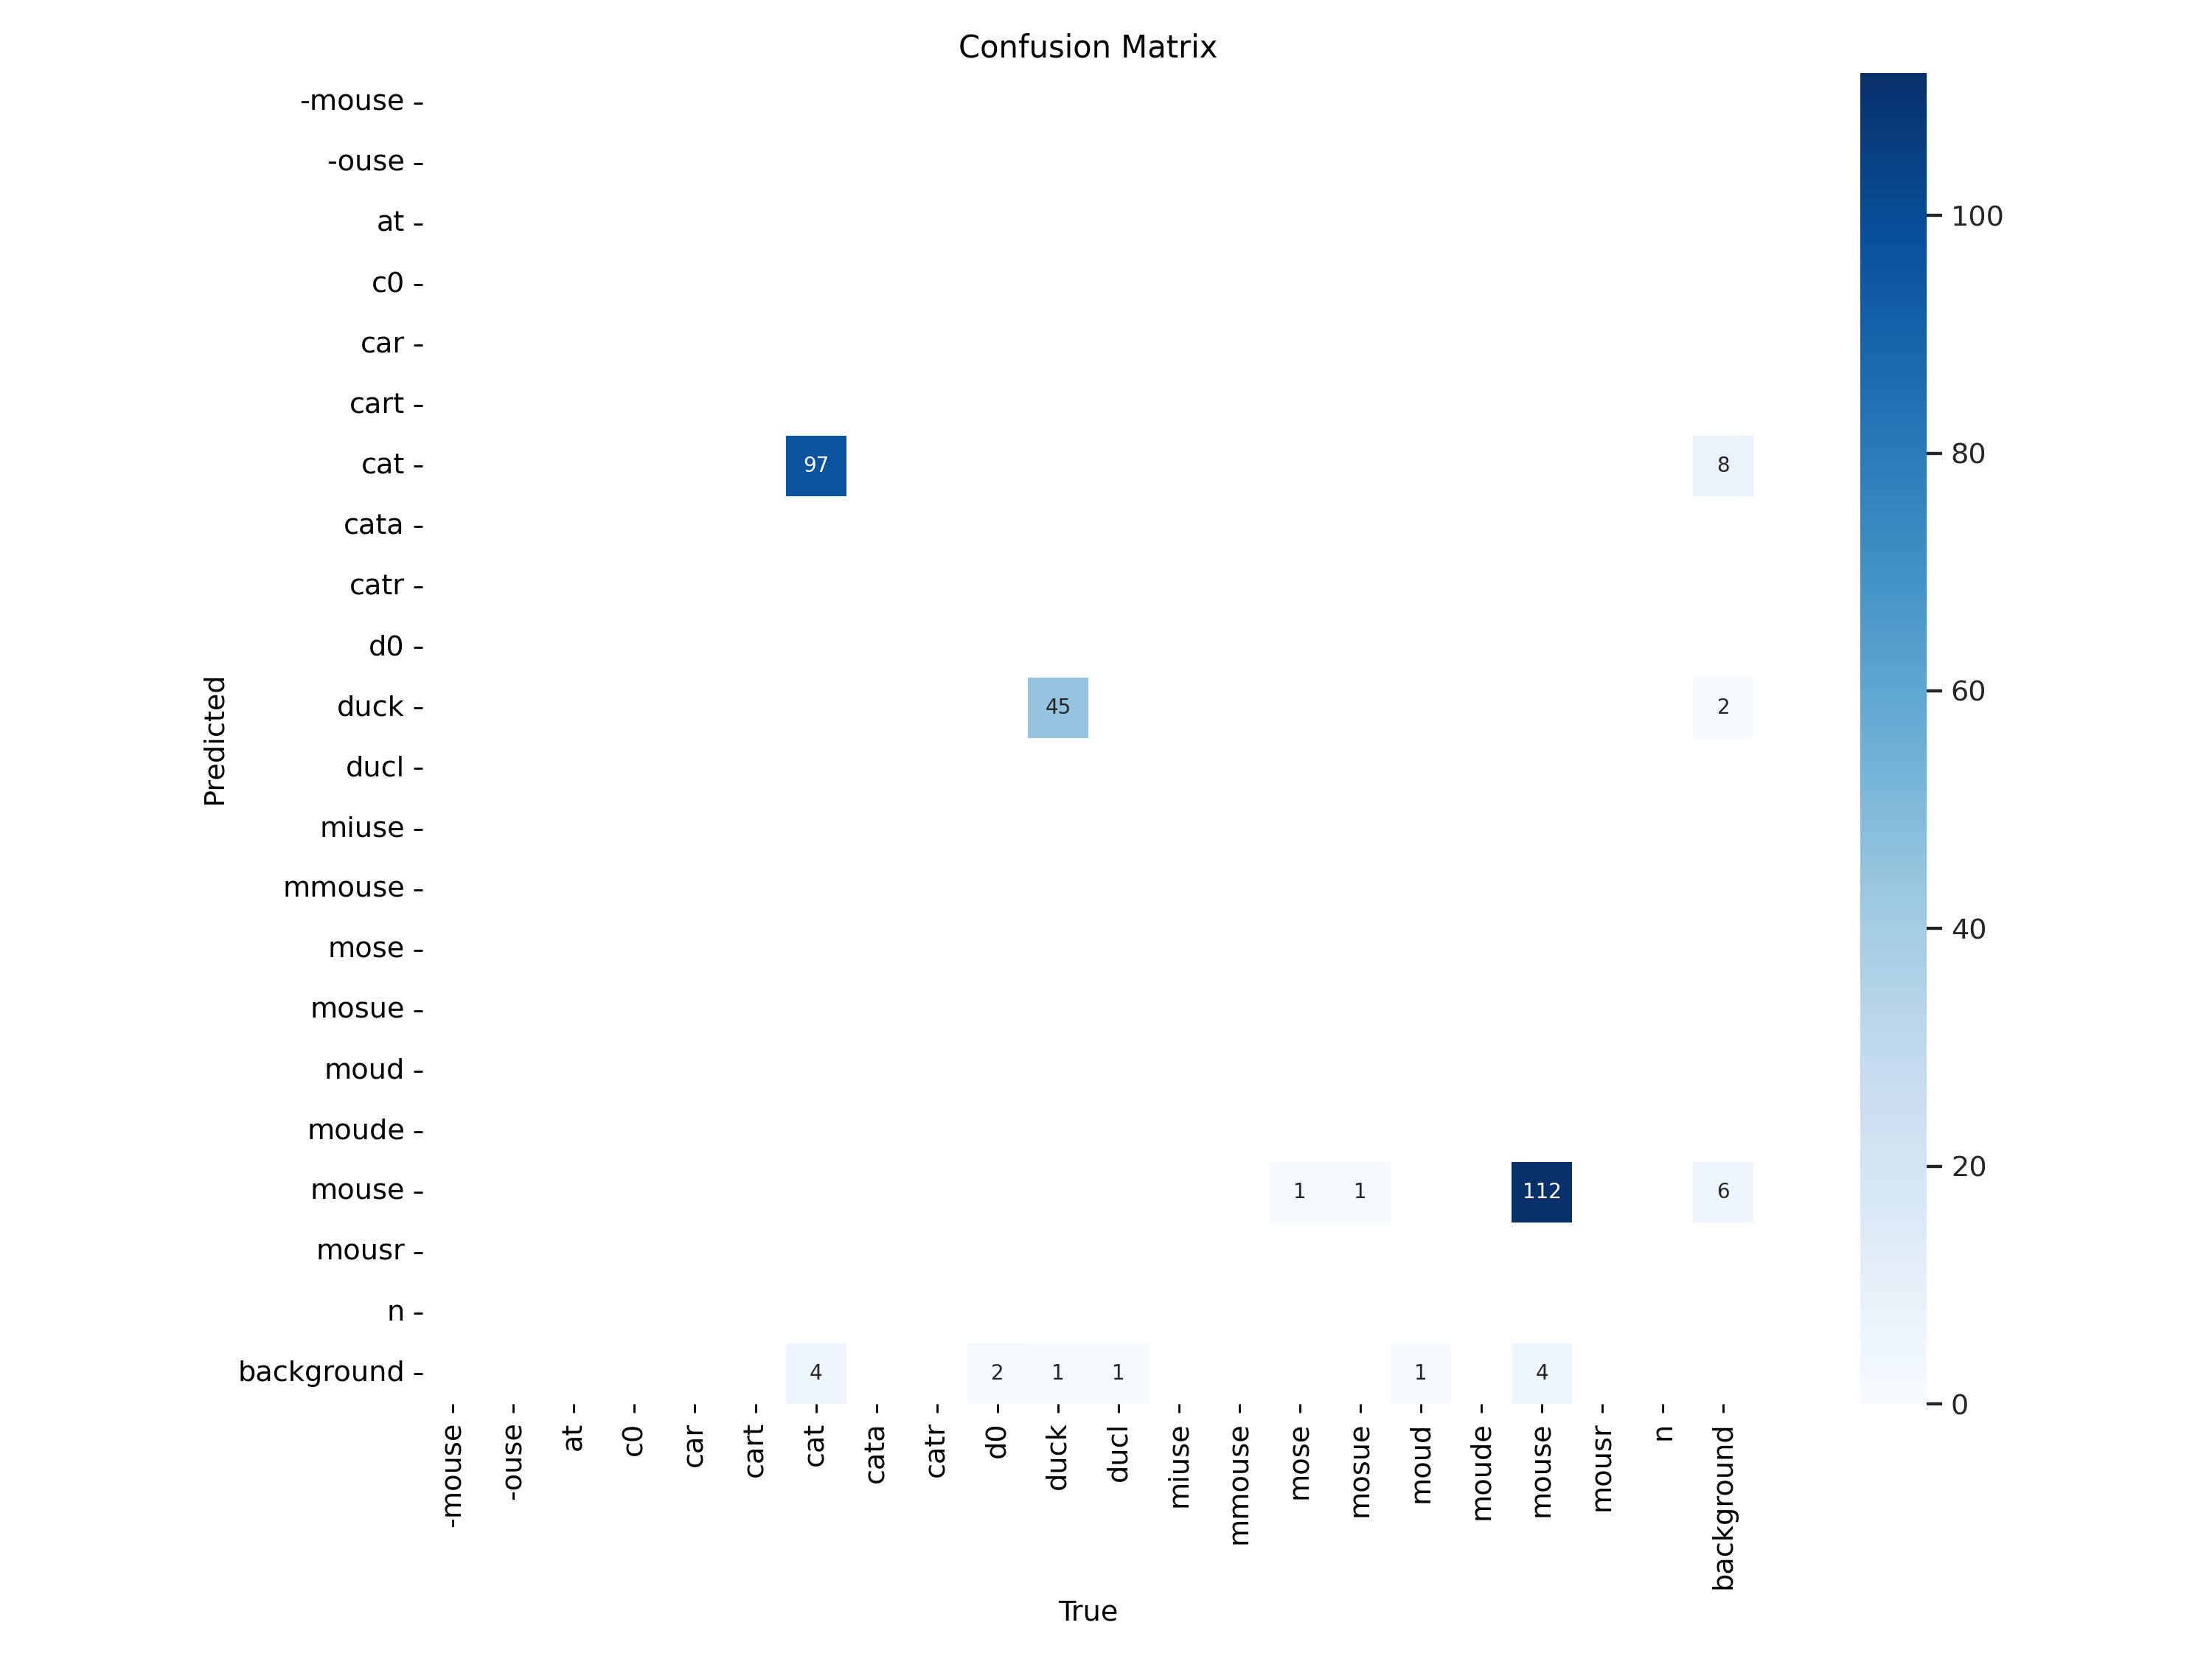

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


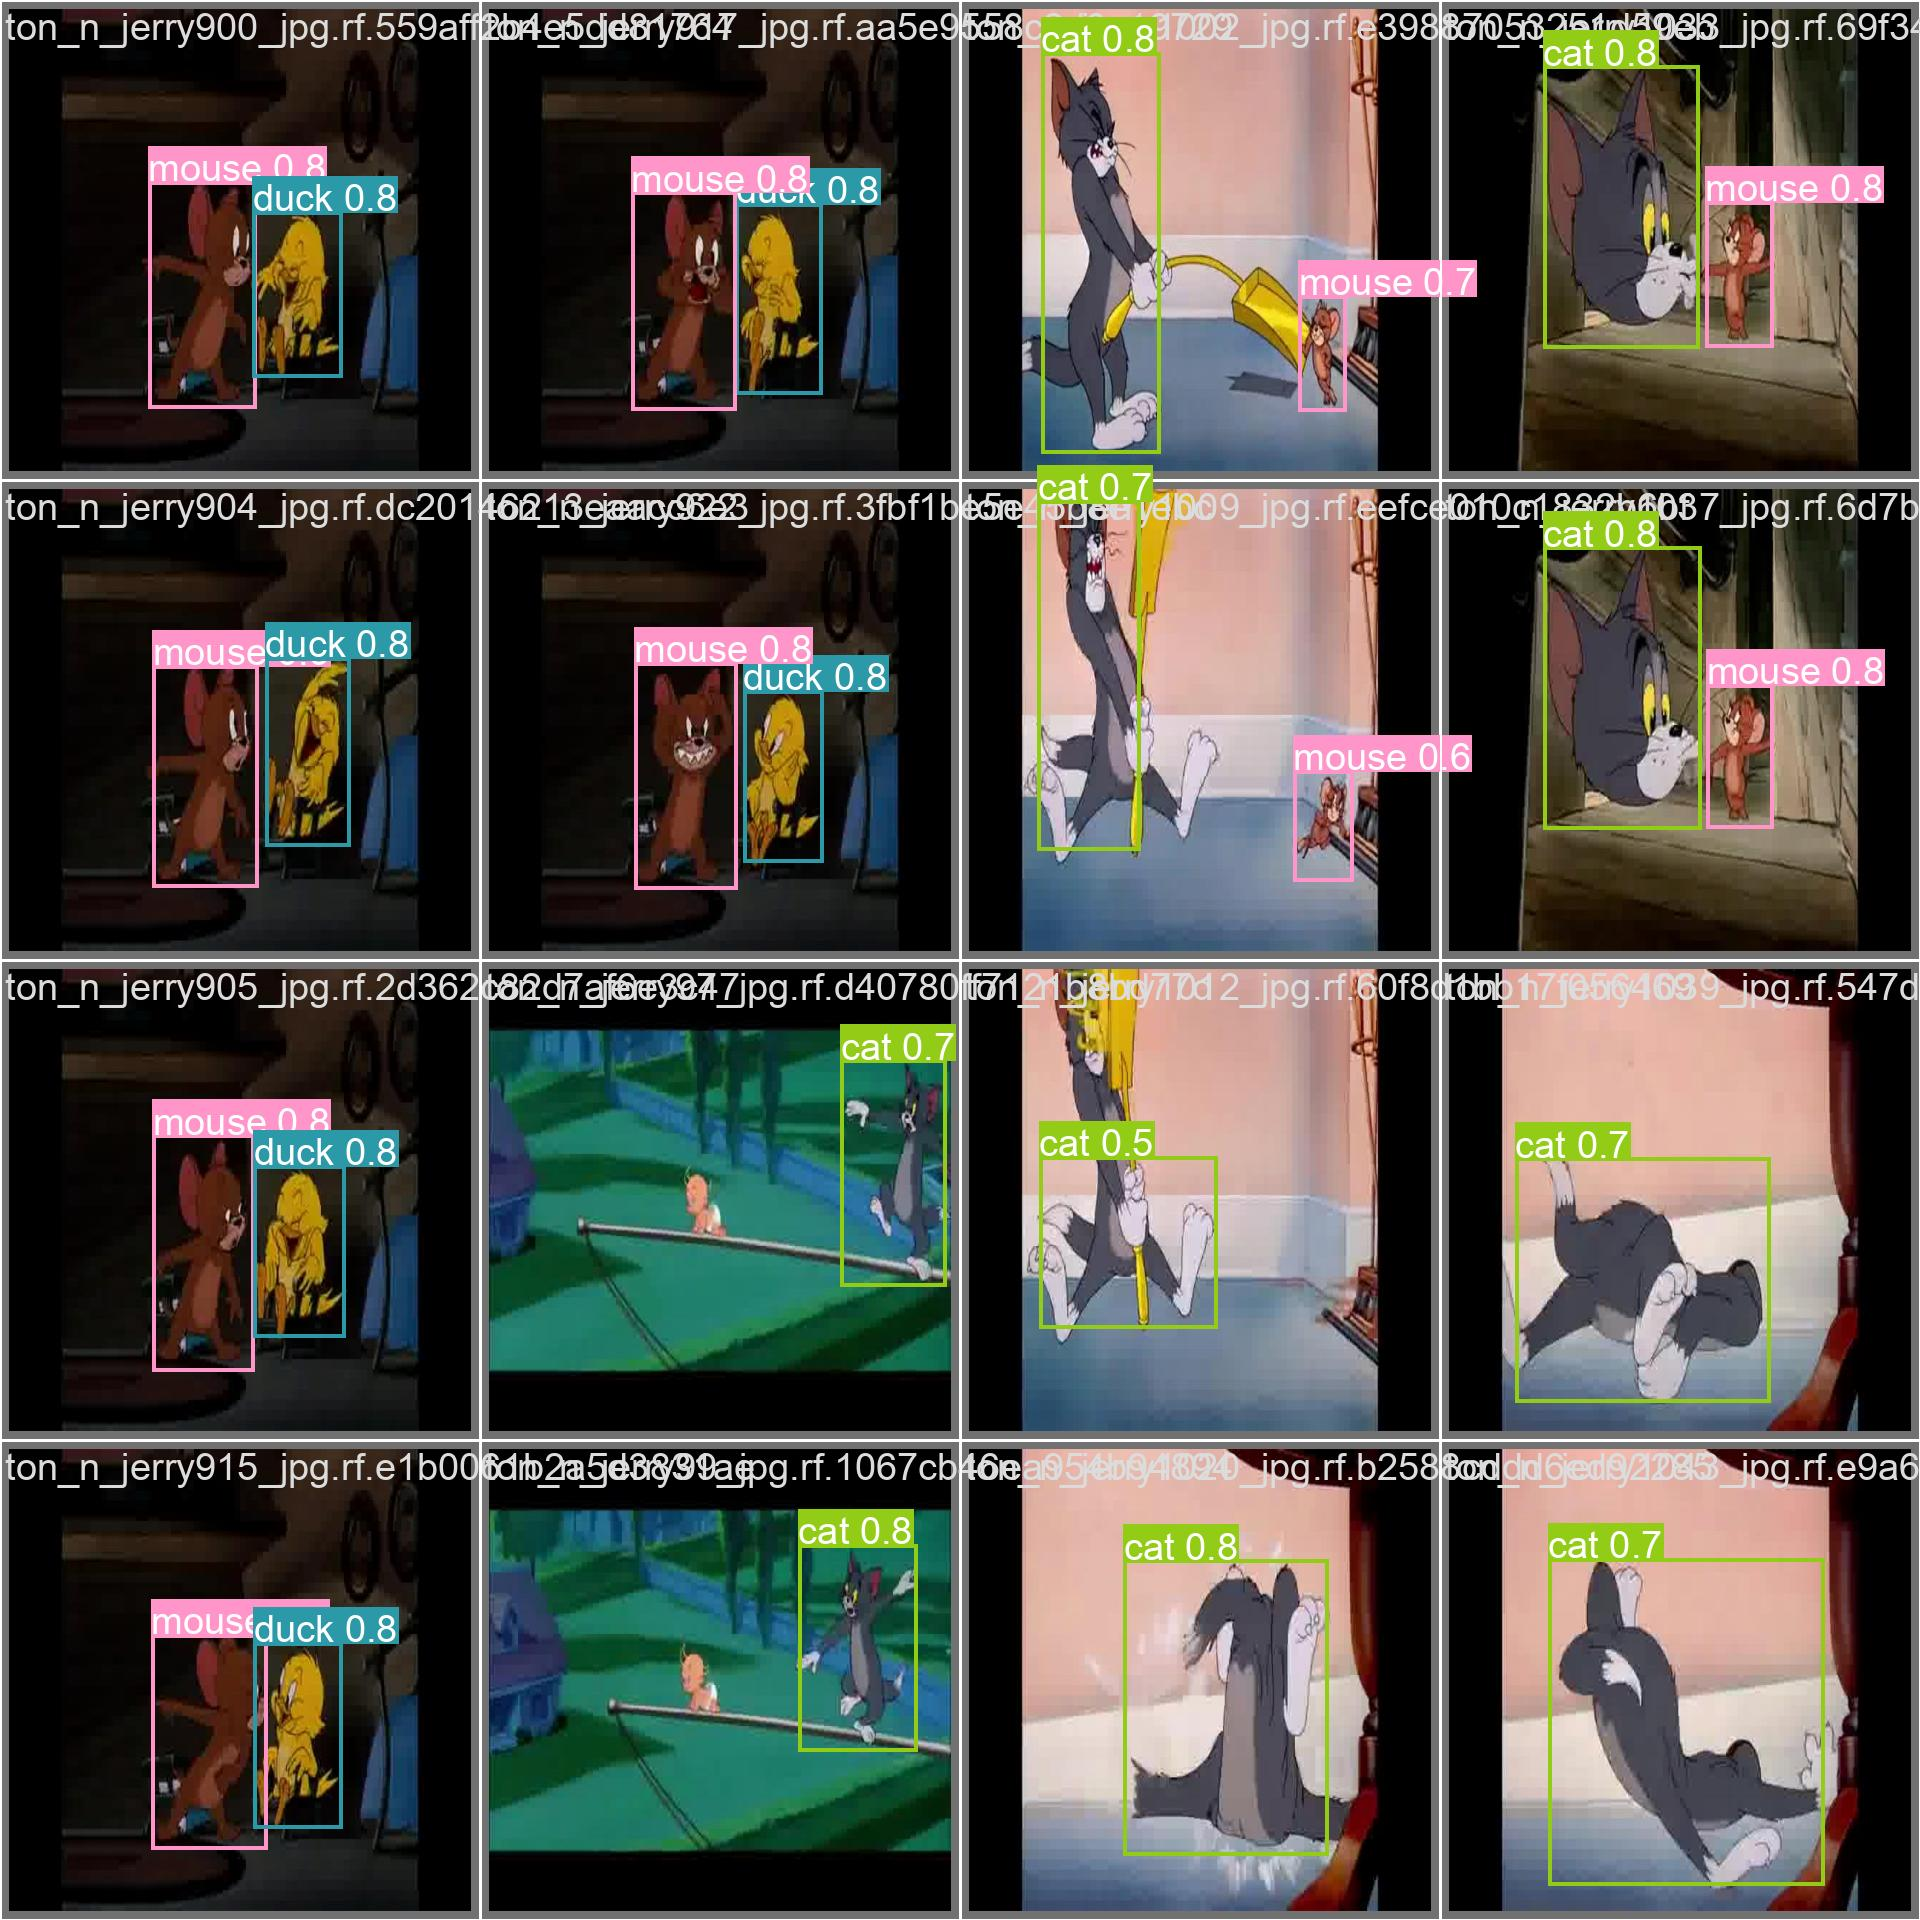

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [24]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/cartoon-1/valid/labels.cache... 168 images, 0 backgrounds, 0 corrupt: 100% 168/168 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:05<00:00,  1.88it/s]
                   all        168        269      0.606      0.356      0.425      0.237
                   cat        168        101       0.94      0.937      0.953       0.59
                    d0        168          2          1          0      0.499       0.15
                  duck        168         46      0.978      0.949      0.982      0.613
                  ducl        168          1          0          0          0          0
                  mose        168          1          0          0          0          0
                 mosue        

In [31]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/TE.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/120) /content/TE.mp4: 480x800 (no detections), 109.6ms
video 1/1 (2/120) /content/TE.mp4: 480x800 1 cat, 15.7ms
video 1/1 (3/120) /content/TE.mp4: 480x800 1 cat, 15.7ms
video 1/1 (4/120) /content/TE.mp4: 480x800 1 cat, 15.6ms
video 1/1 (5/120) /content/TE.mp4: 480x800 1 mouse, 15.7ms
video 1/1 (6/120) /content/TE.mp4: 480x800 2 cats, 15.6ms
video 1/1 (7/120) /content/TE.mp4: 480x800 2 cats, 15.6ms
video 1/1 (8/120) /content/TE.mp4: 480x800 2 cats, 15.6ms
video 1/1 (9/120) /content/TE.mp4: 480x800 (no detections), 15.6ms
video 1/1 (10/120) /content/TE.mp4: 480x800 1 cat, 15.6ms
video 1/1 (11/120) /content/TE.mp4: 480x800 1 cat, 1 mouse, 15.6ms
video 1/1 (12/120) /content/TE.mp4: 480x800 (no detections), 15.7ms
video 1/1 (13/120) /content/TE.mp4: 480x800 (no detections), 15.6ms
video 1/1 (14/120) /content/TE